In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from itertools import product
from pylab import mpl , plt

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [7]:
def Strategy_1(raw,s,l):
    data=pd.DataFrame(raw).dropna()
    Period=14;
    N=data['Date'].count();
    s_sma=s;
    l_sma=l;
    data.reset_index(drop=True, inplace=True)
    i=1;
    while i<N:
        data.loc[i,'Change']=data.loc[i,'Close']-data.loc[i-1,'Close'];
        i+=1;
    data['profit']=np.where(data['Change']>0,data['Change'],0)
    data['Loss']=np.where(data['Change']<0,-data['Change'],0)
    data['five_d_sharpest_drop']=data['Change'].rolling(5).min();
    data['sharpest_drop_indicator']=np.where(data['five_d_sharpest_drop']==data['Change'],1,0)
    data['average_profit']=data['profit'].rolling(Period).mean()
    data['average_loss']=data['Loss'].rolling(Period).mean()
    data['rs']=data['average_profit']/data['average_loss']
    data['rsi']=100-100/(data['rs']+1)
    data['s_sma']=data['Close'].rolling(s_sma).mean();
    data['l_sma']=data['Close'].rolling(l_sma).mean();
    Data=pd.DataFrame(data[['Date','rsi','s_sma','l_sma','sharpest_drop_indicator','Close']])
    Data['Position']=0;
    Data.reset_index(drop=True, inplace=True)
    i=0;
    while i<N:
        if Data.loc[i,'rsi']<24 and Data.loc[i,'s_sma']>Data.loc[i,'l_sma']:
            if Data.loc[i,'sharpest_drop_indicator']==1 and i<N:
                Data.loc[i+1,'Position']=1;
                i+=1;
                while i<N:
                    if Data.loc[i,'Close']>Data.loc[i,'s_sma'] and i<N:
                        i+=1;
                        break;
                    Data.loc[i,'Position']=1;
                    i+=1;
        i+=1;
    Data['Position']=np.where(Data['Position']==0,-1,1)
    ax=Data.plot(x='Date',secondary_y='Position', figsize=(30,10))
    m=0;
    Data['gain']=0;
    while m<N:
        if Data.loc[m,'Position']==1: 
            k=1;j=m;
            while k is not 0:
                if Data.loc[j,'Position']==-1 and j<N:
                    Data.loc[j,'gain']=Data.loc[j,'Close']-Data.loc[m,'Close'];
                    k=0;
                    break;
                j+=1;
        m+=1;
    data_returns=pd.DataFrame(Data[['gain']])
    output=pd.DataFrame();
    success_trade=data_returns[data_returns['gain']>0].count();
    output['success_trades']=success_trade;
    loss_trade=data_returns[data_returns['gain']<0].count();
    output['loss_trades']=loss_trade;
    total_trade=success_trade+loss_trade;
    output['total_trades']=total_trade;
    hit_ratio=success_trade/total_trade;
    output['hit_ratio']=hit_ratio;
    net_return=data_returns['gain'].sum();
    output['net_return']=net_return;
    Data['Returns']=np.log(Data['Close']/Data['Close'].shift(1));
    Data['Strategy']= Data['Position'].shift(1)*Data['Returns'];
    np.exp(Data[['Returns','Strategy']]);
    ax=Data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(20,15))
    Data['Position'].plot(ax=ax, secondary_y='Position', style='--')
    output['Returns_v_b']=np.exp(Data['Returns'].sum());
    output['Strategy_v_b']=np.exp(Data['Strategy'].sum());
    
    return output;

In [8]:
AXISBANK=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/AXISBANK.NS.csv', parse_dates=True)

ADANIPORTS=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/ADANIPORTS.NS.csv', parse_dates=True)

ASIANPAINT=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/ASIANPAINT.NS.csv', parse_dates=True)

BAJAJAUTO=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BAJAJ-AUTO.NS.csv', parse_dates=True)

BAJAJFINSV=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BAJAJFINSV.NS.csv', parse_dates=True)

BAJFINANCE=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BAJFINANCE.NS.csv', parse_dates=True)

BHARTIARTL=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BHARTIARTL.NS.csv', parse_dates=True)

BPCL=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BPCL.NS.csv', parse_dates=True)

BRITANNIA=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/BRITANNIA.NS.csv', parse_dates=True)

CIPLA=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/CIPLA.NS.csv', parse_dates=True)

INFRATEL=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/INFRATEL.NS.csv', parse_dates=True)

APPLE=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/AAPL.csv', parse_dates=True)


,success_trades,loss_trades,total_trades,hit_ratio,net_return,Returns_v_b,Strategy_v_b
gain,6,0,6,1.0,68.949952,2.827403,0.412111


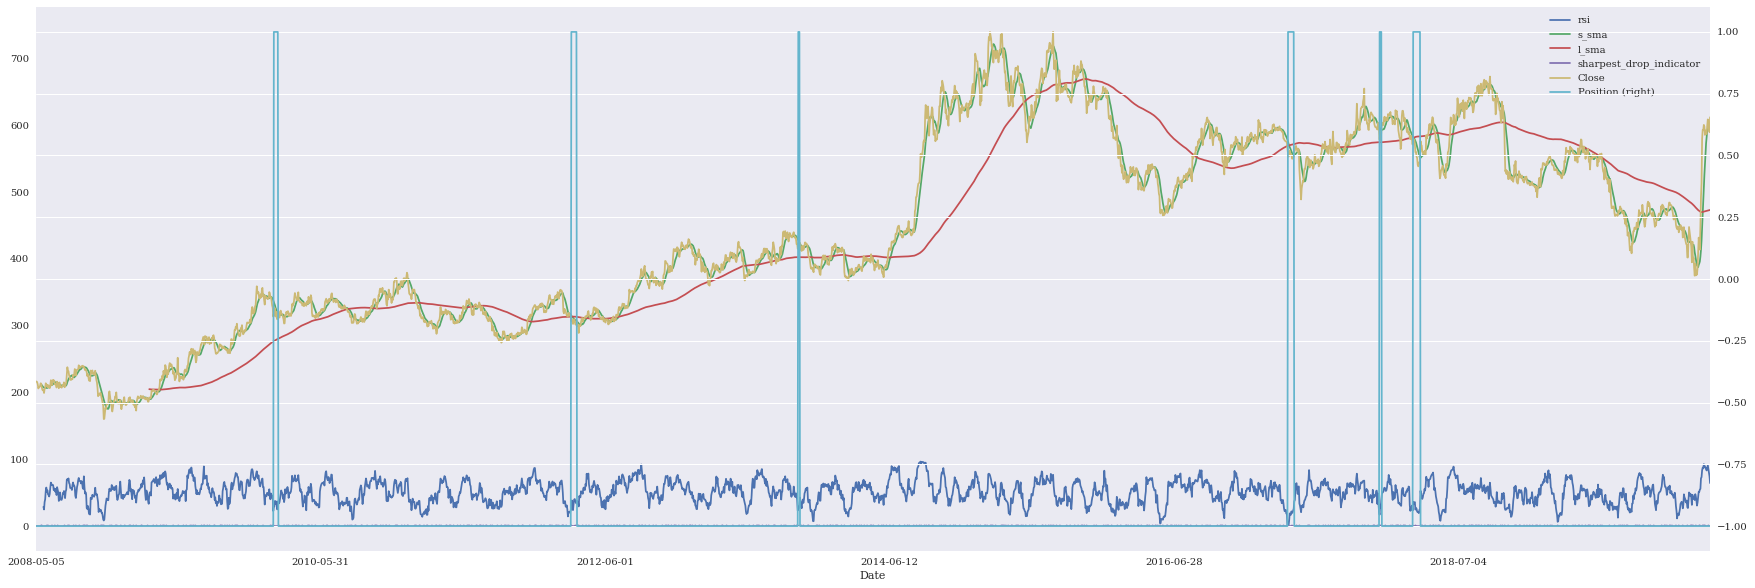

In [ ]:
Strategy_1(CIPLA,10,200)